In [2]:
import networkx as nx
import random
import networkx as nx
from matplotlib import pyplot, patches
from scipy import io
import numpy as np
from collections import defaultdict
import pickle
import pandas as pd
from tqdm import tqdm
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 

C:\Users\wyw25\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\wyw25\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [3]:
# import empirical netwrok
em_mat=pd.read_csv('C:/Users/wyw25/thesis/MAT_experiment/2018-02-05.csv', header=None)

In [4]:
# load the nestedness of the empirical netwrok
N_list=[]
Q_list=[]
I_list=[]
I_MQ_list=[]

for i in range(200):
    nestedness=pd.read_csv("C:/Users/wyw25/thesis/2018-02-05/"+str(i)+"/data_structures_NQI_results2018-02-05.csv")
    
    N=nestedness['N'].values[0]
    Q=nestedness['Q'].values[0]
    I=nestedness['I'].values[0]
    I_MQ=nestedness['I_MQ'].values[0]
    
    
    N_list.append(N)
    Q_list.append(Q)
    I_list.append(I)
    I_MQ_list.append(I_MQ)


In [5]:
N_observation=np.mean(N_list)
Q_observation=np.mean(Q_list)
I_observation=np.mean(I_list)
I_MQ_observation=np.mean(I_MQ_list)


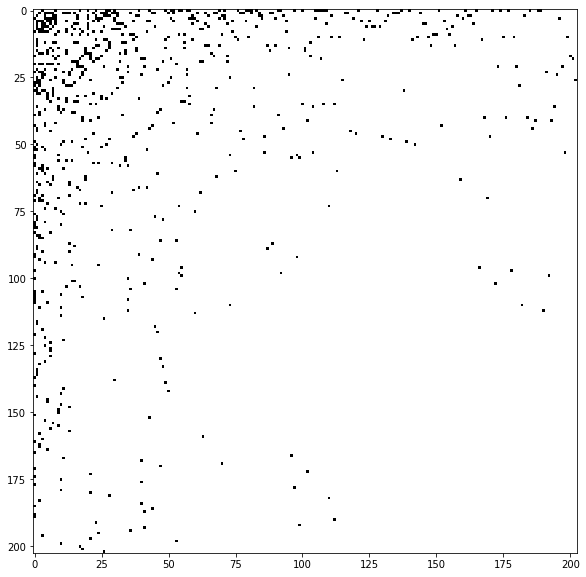

In [7]:
G_empirical=nx.from_numpy_array(np.array(em_mat))
degreeofday=dict(G_empirical.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G_empirical,nodenewlist)

In [8]:
# import the simulated network
# load the dict of dataframes
with open('simulation_200/simulation_200_real.pkl', 'rb') as fp:
    simutable = pickle.load(fp)


In [9]:
# import the computed Q, nodf, IBNestedness of all simulated point

with open('parameter_200/I.pkl', 'rb') as fp:
    I = pickle.load(fp)
    
with open('parameter_200/Q.pkl', 'rb') as fp:
    Q = pickle.load(fp)
    
with open('parameter_200/N.pkl', 'rb') as fp:
    N = pickle.load(fp)
    
with open('parameter_200/I_MQ.pkl', 'rb') as fp:
    I_MQ = pickle.load(fp)


In [10]:
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_array(G, dtype=bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(10, 10)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth=1))
            current_idx += len(module)

In [11]:
#combination1

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k]  
   
    return average_degree,clustering_coefficient,Q_index,N_index,I_index

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return average_degree,clustering_coefficient,Q_index,N_index,I_index

In [45]:
# combination2

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
  #  average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
  #  clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k] 
        
    
    return Q_index,N_index,I_index

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
   # average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
  #  clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return Q_index,N_index,I_index

In [36]:
# combination3

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k] 
    
    
    
    return average_degree,clustering_coefficient

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return average_degree,clustering_coefficient

In [12]:
def likelihood(params, real_data, simulated_data):
    """
    Calculate the likelihood of observing the real data given the parameters.

    Parameters:
    - params: array-like, the parameters (pL_s, pL_d, pNL_nl)
    - real_data: array-like, the real network properties (average_degree, average_path_length, clustering_coefficient)
    - simulated_data: array-like, the simulated network properties for the given parameters
    - uncertainties: array-like, uncertainties for each network property

    Returns:
    - likelihood_value: float, the likelihood value
    """
    # Calculate the squared differences between simulated and real data

    squared_diff = ((simulated_data - real_data) / np.std(simulated_data))**2


    # Calculate the log-likelihood (assuming normal distribution)
    log_likelihood = -0.5 * np.sum(squared_diff)
    likelihood=np.exp(log_likelihood)

    return likelihood



In [14]:
parameter_LIST = {}
for i in tqdm(range(len(simutable))):
    parameter_LIST[i] = {}
    for j in range(len(simutable[1])):
        parameter_LIST[i][j] = {}
        for k in range(len(simutable[1][1])):
            simumat=simutable[i][j][k]
            G_simu=nx.from_numpy_array(np.array(simutable[i][j][k]))
            parameter_simu=np.array(Compute_properties(G_simu,i,j,k,I,Q,N,I_MQ))
            parameter_LIST[i][j][k]=parameter_simu

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [05:43<00:00, 17.18s/it]


In [15]:
# Example usage:
# Replace the following with your actual data and uncertainties
real_data =np.array(Compute_properties_OBSERVATION(G_empirical,N_observation,I_observation,Q_observation,I_MQ_observation))
#uncertainties = np.array([0.2, 0.2, 0.2])
likelihoodlist=[]

compare=0
i_max=0
j_max=0
k_max=0

for i in range(len(simutable)):
    for j in range(len(simutable[1])):
        for k in range(len(simutable[1][1])):           
            simulated_data = parameter_LIST[i][j][k]

            # Replace with the actual parameter values you want to evaluate
            parameters_to_evaluate = np.array([0.5,0.5, 0.5])

            # Calculate the likelihood for the given parameters
            likelihood_value = likelihood(parameters_to_evaluate, real_data, simulated_data)
            
            if np.isnan(likelihood_value):
                likelihood_value=0
            if likelihood_value>compare:
                compare=likelihood_value
                i_max=i
                j_max=j
                k_max=k
                
            
            likelihoodlist.append(likelihood_value)

            print("Likelihood:", likelihood_value)

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 7.214454172329166e-266
Likelihood: 1.4475773023507717e-178
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.113293227364336e-97
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.631443e-317
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.3174308405988e-68
Likelihood: 6.335536299943247e-199
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.043876870827792e-199
Likelihood: 2.7687667132396824e-229
Likelihood: 1.393e-321
Likelihood: 5.9456206596764786e-297
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.610105399862249e-136
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.531071287159824e-66
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.3879328234269083e-187
Likelih

Likelihood: 4.4829099397969575e-08
Likelihood: 2.0555526839101193e-05
Likelihood: 5.62675960776428e-06
Likelihood: 0.5005376500483493
Likelihood: 0.4846903126151457
Likelihood: 0.41729095586018855
Likelihood: 0.4699156368650471
Likelihood: 0.6716188860248061
Likelihood: 0.7951138023969433
Likelihood: 0.31305469372288486
Likelihood: 0.41038833039121275
Likelihood: 0.5664786585147256
Likelihood: 0.3942758352900981
Likelihood: 0.48904776810126804
Likelihood: 0.5528905789918814
Likelihood: 0.360791372050298
Likelihood: 0.03382384865376767
Likelihood: 0.4666274240336739
Likelihood: 1.2158451791648876e-05
Likelihood: 0.005697673874786058
Likelihood: 1.113119845485958e-06
Likelihood: 9.045631269761876e-06
Likelihood: 0.0017428093387348808
Likelihood: 0.001626981648572392
Likelihood: 9.168277537161761e-07
Likelihood: 0.0016534994713474256
Likelihood: 3.0837914325509584e-06
Likelihood: 0.00010796540198256731
Likelihood: 3.117827419627517e-05
Likelihood: 1.6791342264213247e-05
Likelihood: 0.0018

Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.

Likelihood: 5.963195772463948e-108
Likelihood: 4.311481036431616e-237
Likelihood: 4.2027060525247135e-204
Likelihood: 2.239705853913535e-271
Likelihood: 0.0
Likelihood: 4.591297315244448e-202
Likelihood: 6.955074648562818e-80
Likelihood: 2.2833630775277547e-232
Likelihood: 6.790032681021092e-152
Likelihood: 4.320735620209044e-170
Likelihood: 8.586903619232207e-142
Likelihood: 2.309392860145218e-202
Likelihood: 5.471755029681755e-238
Likelihood: 1.3766846117889927e-139
Likelihood: 4.0484710487560877e-196
Likelihood: 0.0
Likelihood: 2.472842514170754e-144
Likelihood: 9.97694488916975e-230
Likelihood: 6.3623693848703825e-201
Likelihood: 0.0
Likelihood: 1.1407371969676968e-212
Likelihood: 4.85607744185694e-22
Likelihood: 6.315241798722678e-207
Likelihood: 3.0961340293490667e-234
Likelihood: 3.0975651103893985e-181
Likelihood: 1.61774336882e-312
Likelihood: 4.157260934067455e-39
Likelihood: 5.309971532079178e-152
Likelihood: 4.154206071368835e-24
Likelihood: 7.537803307346664e-290
Likelihoo

Likelihood: 0.016153751950503285
Likelihood: 0.053937345898612564
Likelihood: 0.006795619175439954
Likelihood: 0.805324891517991
Likelihood: 0.03734421398564905
Likelihood: 0.00898980485014944
Likelihood: 0.007528586621687692
Likelihood: 0.28672130393834533
Likelihood: 0.012850162263874663
Likelihood: 0.04822154254564033
Likelihood: 0.07953836059176705
Likelihood: 0.056727769450397925
Likelihood: 0.03618098521556448
Likelihood: 0.0033812670813011007
Likelihood: 0.09502983261569661
Likelihood: 0.03551887545484066
Likelihood: 0.010774588999083914
Likelihood: 0.030608694494617797
Likelihood: 0.04265527031374732
Likelihood: 0.018115279348477276
Likelihood: 0.030638593569685468
Likelihood: 0.7181706906739296
Likelihood: 0.01302542199627381
Likelihood: 0.0973801329570882
Likelihood: 0.17358419256904778
Likelihood: 0.7134436735980265
Likelihood: 0.012684391695520865
Likelihood: 0.0019096625942145908
Likelihood: 0.010431435503148574
Likelihood: 0.6602465892771696
Likelihood: 0.0447299206476627

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.900977024386497e-112
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.1858610262414135e-196
Likelihood: 0.0
Likelihood: 1.520671097496664e-50
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0

Likelihood: 0.24606514941859015
Likelihood: 5.221286631877728e-11
Likelihood: 1.834249640224866e-14
Likelihood: 2.3084971792508966e-15
Likelihood: 7.775130979402611e-22
Likelihood: 3.0800015502078086e-09
Likelihood: 8.512700735057301e-10
Likelihood: 2.837327968230231e-10
Likelihood: 3.965176769985498e-09
Likelihood: 2.1386352238843417e-11
Likelihood: 5.20019767095458e-19
Likelihood: 1.3517081934731174e-07
Likelihood: 1.555087844813693e-05
Likelihood: 0.37840244155206954
Likelihood: 2.9755508477553286e-07
Likelihood: 8.443627655979502e-09
Likelihood: 1.0812020253456168e-13
Likelihood: 1.5084394759539055e-10
Likelihood: 0.2878805337866505
Likelihood: 0.04593758326050509
Likelihood: 0.27518461862991106
Likelihood: 0.15433088109983956
Likelihood: 2.0423270070349084e-08
Likelihood: 0.12499063914133768
Likelihood: 0.40145613408115877
Likelihood: 0.6173168465529401
Likelihood: 0.006660734918655314
Likelihood: 4.162361156985162e-15
Likelihood: 0.2841543722688562
Likelihood: 0.2432516935291896


Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.29172150118897e-94
Likelihoo

Likelihood: 0.03370114986369373
Likelihood: 0.11941362728463475
Likelihood: 0.5700456417785338
Likelihood: 2.6803677328602974e-28
Likelihood: 0.09641029264136429
Likelihood: 0.06244906594006276
Likelihood: 1.1301067770461808e-41
Likelihood: 0.022721700414319528
Likelihood: 0.0017038278825815538
Likelihood: 1.00308017942435e-24
Likelihood: 0.66160905770638
Likelihood: 1.0662950830996033e-17
Likelihood: 1.0802454211982475e-32
Likelihood: 1.9750796163330778e-28
Likelihood: 1.0817993582465937e-06
Likelihood: 1.4703874760779323e-09
Likelihood: 9.130274907877174e-28
Likelihood: 1.1523881161034754e-19
Likelihood: 3.495226940108017e-11
Likelihood: 1.3048334545753926e-24
Likelihood: 2.7312222991653557e-29
Likelihood: 1.7619556282255655e-13
Likelihood: 1.5782265274861709e-27
Likelihood: 3.5149402253316965e-13
Likelihood: 2.1847808274050286e-31
Likelihood: 5.808039518196763e-20
Likelihood: 5.348122325715254e-26
Likelihood: 0.03620083773521606
Likelihood: 6.197080489073732e-29
Likelihood: 3.253808

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.7977144270787607e-195
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.6617271396385934e-150
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.0384980283731403e-84
Likelihood: 0.0
Likelihood: 4.0913397818861445e-141
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0

Likelihood: 6.812572972732101e-23
Likelihood: 5.36478991124187e-33
Likelihood: 2.557815227826578e-28
Likelihood: 9.237098304135685e-45
Likelihood: 2.63214024569086e-10
Likelihood: 4.671979428682865e-31
Likelihood: 2.3079124105847883e-39
Likelihood: 1.1430294495025679e-36
Likelihood: 9.330461823957953e-25
Likelihood: 3.0774409015998266e-30
Likelihood: 3.814779368480409e-24
Likelihood: 1.878984386454598e-39
Likelihood: 5.823056181231555e-32
Likelihood: 2.7775363446509364e-40
Likelihood: 3.6882653121713473e-16
Likelihood: 0.033913978263978274
Likelihood: 2.926420768805157e-11
Likelihood: 9.0225586387888e-39
Likelihood: 6.42429438824772e-39
Likelihood: 0.06469794673953343
Likelihood: 2.2100838342474685e-06
Likelihood: 1.0084083355078575e-13
Likelihood: 0.00044726907692878136
Likelihood: 0.06398467224021169
Likelihood: 0.01565878685965798
Likelihood: 3.264552923107103e-62
Likelihood: 0.09205363491453206
Likelihood: 0.0035957261258222828
Likelihood: 1.9019556511037898e-35
Likelihood: 0.73975

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 1.5059658037785174e-99
Likelihood: 0.0
Likelihood: 0
Likelihood: 1.52278575512839e-99
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Like

Likelihood: 5.99571007278032e-48
Likelihood: 1.4611307999740337e-10
Likelihood: 4.3497054939609856e-08
Likelihood: 7.11795686699119e-57
Likelihood: 2.917100444781721e-43
Likelihood: 1.6020336225987347e-65
Likelihood: 3.984481930064247e-08
Likelihood: 1.2775293728232533e-46
Likelihood: 7.288371637020663e-05
Likelihood: 5.205415638411388e-07
Likelihood: 0.0007275779815929292
Likelihood: 5.940962652113826e-52
Likelihood: 6.147346499032714e-40
Likelihood: 3.6078720199373014e-66
Likelihood: 0.0002906516963717826
Likelihood: 0.005343171889531132
Likelihood: 0.009232138892577261
Likelihood: 1.638132879889768e-45
Likelihood: 5.71251506194697e-45
Likelihood: 0.00026943663943596394
Likelihood: 2.11045929251763e-05
Likelihood: 7.70556243734131e-58
Likelihood: 0.09167281681341413
Likelihood: 3.113794745707753e-88
Likelihood: 0.22768995391912453
Likelihood: 1.425813515493095e-05
Likelihood: 9.469717168719978e-63
Likelihood: 6.710072092633702e-05
Likelihood: 0.03383864762815666
Likelihood: 2.1777780

Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Li

Likelihood: 1.1033735973479724e-18
Likelihood: 1.253779687527042e-182
Likelihood: 6.127503829786105e-16
Likelihood: 2.313288831997222e-217
Likelihood: 3.6063564549693497e-07
Likelihood: 4.562302322434297e-14
Likelihood: 3.0933285268847087e-176
Likelihood: 4.912721730996393e-166
Likelihood: 2.895720956303332e-142
Likelihood: 2.7769329136445896e-152
Likelihood: 1.8755575572860973e-11
Likelihood: 0.0
Likelihood: 4.3647771277946834e-16
Likelihood: 2.2270340584251333e-173
Likelihood: 1.715178457791519e-186
Likelihood: 3.290723373827374e-61
Likelihood: 8.149030823127438e-265
Likelihood: 8.136975957281045e-103
Likelihood: 1.8154840416603726e-133
Likelihood: 4.134920902088528e-122
Likelihood: 1.2142021534245426e-116
Likelihood: 5.333854805670982e-16
Likelihood: 1.3265533054338369e-182
Likelihood: 2.522032143667029e-59
Likelihood: 7.583964087322882e-70
Likelihood: 1.2535631593670128e-100
Likelihood: 2.897568288720711e-98
Likelihood: 2.7598583030143896e-61
Likelihood: 8.523866708385459e-67
Likel

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 5.724393545106284e-29
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 9.270363901192257e-118
Likelihood: 3.2620756518358794e-181
Likelihood: 2.4917868438130313e-246
Likelihood: 3.0534727232000724e-299
Likelihood: 4.2424799462806843e-190
Likelihood: 1.1706381931263545e-186
Likelihood: 8.02503877848912e-207
Likelihood: 3.213140587517179e-210
Likelihood: 2.3426865709341423e-138
Likelihood: 2.421183833406514e-149
Likelihood: 9.91158167851691e-228
Likelihood: 4.09888560571693e-251
Likelihood: 0.0
Likelihood: 2.8082117429004792e-273
Likelihood: 6.2218918751861846e-164
Likelihood: 3.4883618137476188e-37
Likelihood: 2.31378129471761e-50
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.3e-322
Likelihood: 6.66149512667403e-248
Likelihood: 2.902408903491298e-188
Likelihood: 0.0
Likelihood: 1.1317073321844533e-235
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.0017210027852627e-254
Likelihood: 3.1346974457628216e-2

Likelihood: 0.9111089557570989
Likelihood: 0.8996206798054828
Likelihood: 0.8337772256141797
Likelihood: 0.8956444625074164
Likelihood: 0.899231952002781
Likelihood: 0.8894700150956338
Likelihood: 0.8695741185666706
Likelihood: 0.8748217743482537
Likelihood: 0.7052654707031202
Likelihood: 0.8876406181692399
Likelihood: 0.5883026997589077
Likelihood: 0.6142444762104421
Likelihood: 0.8980797563088873
Likelihood: 0.4931377159542981
Likelihood: 0.9382740815008768
Likelihood: 0.8939776291838865
Likelihood: 0.9162096847239597
Likelihood: 0.6168885166129894
Likelihood: 0.9379203316143216
Likelihood: 0.9055352107102231
Likelihood: 0.88727260483666
Likelihood: 0.8571263250900722
Likelihood: 0.4811143385759949
Likelihood: 0.5503577603803748
Likelihood: 0.8375138737518619
Likelihood: 0.8745726983545923
Likelihood: 0.4437339524504764
Likelihood: 0.5692663772027551
Likelihood: 0.510227834632391
Likelihood: 0.5867478291929931
Likelihood: 0.47976315712638007
Likelihood: 0.4519087783498038
Likelihood:

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.9643608342643044e-180
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.93943757931161e-292
Likelihood: 3.1e-322
Likelihood: 0.0
Likelihood: 6.912714336131213e-24
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.188187303564273e-167
Likelihood: 0.0
Likelihood: 1.597532013103608e-255
Likelihood: 5.4361260335671044e-294
Likelihood: 7.451431033595349e-211
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.6448367762107993e-194
Likelihood: 0.0
Likelihood: 4.869443447979685e-176
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.3261054894659618e-231
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.63e-321
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4

Likelihood: 0.013328283682009926
Likelihood: 0.10213195077911012
Likelihood: 0.01599715095356947
Likelihood: 0.020632835162088303
Likelihood: 0.7322532619513769
Likelihood: 0.027424493346710228
Likelihood: 0.2222644393547952
Likelihood: 0.0029326145250571653
Likelihood: 0.005524199475322721
Likelihood: 0.015046977980967689
Likelihood: 0.6913886096165702
Likelihood: 0.7618806060105571
Likelihood: 0.6603165084961389
Likelihood: 0.017878556938329983
Likelihood: 0.04102461933682472
Likelihood: 0.7293774374959933
Likelihood: 0.7034403534851004
Likelihood: 0.7415824155533595
Likelihood: 0.012345931328097033
Likelihood: 0.7627998648909592
Likelihood: 0.691687709348417
Likelihood: 0.8179886187378212
Likelihood: 0.4012697322936454
Likelihood: 0.5572611997715708
Likelihood: 0.6472129606608067
Likelihood: 0.24103274712065226
Likelihood: 0.2436740958487213
Likelihood: 0.2806063069375918
Likelihood: 0.6572822409814355
Likelihood: 0.28038166184303404
Likelihood: 0.35702585783755686
Likelihood: 0.855

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.807846601904182e-223
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.098912320815577e-238
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.1489773600785237e-270
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 9.484624349624799e-81
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 

Likelihood: 8.171956969830281e-10
Likelihood: 2.320655740354369e-12
Likelihood: 0.7089889177030493
Likelihood: 2.6496174819824046e-15
Likelihood: 8.548677476381884e-13
Likelihood: 0.3544710764836726
Likelihood: 0.0029380227459541723
Likelihood: 1.8717325399290707e-13
Likelihood: 0.18898324650713108
Likelihood: 0.31335174395936466
Likelihood: 0.46789621795653535
Likelihood: 0.30426790611084614
Likelihood: 0.18849356209540605
Likelihood: 0.4025717270968339
Likelihood: 0.32035839649930614
Likelihood: 0.16006413145121606
Likelihood: 0.019496246234691057
Likelihood: 0.3560370098417065
Likelihood: 0.00016995673559239282
Likelihood: 4.406804287575952e-12
Likelihood: 0.003135786197755642
Likelihood: 2.9613732441855024e-06
Likelihood: 3.3413458943153073e-09
Likelihood: 1.4180412198741737e-09
Likelihood: 2.335926709863809e-06
Likelihood: 2.10661321061672e-16
Likelihood: 5.486869229562256e-05
Likelihood: 0.00035916971743279357
Likelihood: 0.0285353501841772
Likelihood: 5.782079639151937e-06
Likel

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.5583864945544276e-195
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.5156712963192764e-144
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.185861026240462e-196
Likelihood: 3.5754643950969644e-122
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.19072684818995e-147
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelih

Likelihood: 1.704922854135263e-24
Likelihood: 2.961884263249548e-38
Likelihood: 3.65790184097591e-49
Likelihood: 7.459998220254098e-32
Likelihood: 0.6192103490268729
Likelihood: 8.611672247974804e-43
Likelihood: 5.328256153475237e-13
Likelihood: 0.0032793742718507787
Likelihood: 0.02697630673933196
Likelihood: 0.0012247721462831287
Likelihood: 5.816179845189981e-27
Likelihood: 0.6836450159716112
Likelihood: 2.4367680210606774e-26
Likelihood: 1.2807967657841159e-34
Likelihood: 1.706229517873578e-32
Likelihood: 0.0001924673549545261
Likelihood: 3.0896886065118485e-14
Likelihood: 4.602690715178291e-05
Likelihood: 0.08182067448077585
Likelihood: 2.281321802253796e-22
Likelihood: 0.009206093419500152
Likelihood: 4.507159275091653e-30
Likelihood: 0.030082173184023262
Likelihood: 1.1737922788317564e-33
Likelihood: 0.042248573462687074
Likelihood: 2.555189990590832e-44
Likelihood: 1.8849255785755116e-34
Likelihood: 0.09198224089640004
Likelihood: 1.6643276102974845e-33
Likelihood: 1.0090591565

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.532075505842776e-130
Likelihood: 3.761702795882883e-256
Likelihood: 0.0
Likelihood: 1.7971093318118388e-184
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.9685110821797946e-200
Likelihood: 2.35573648523105e-56
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.8038777754829366e-87
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeli

Likelihood: 1.675635836043947e-15
Likelihood: 2.0153049903422378e-21
Likelihood: 2.2517382101383976e-47
Likelihood: 7.706826212626208e-13
Likelihood: 3.804409728123064e-46
Likelihood: 1.601961801350062e-23
Likelihood: 6.182461330336422e-21
Likelihood: 9.41431275476619e-18
Likelihood: 8.309909843948376e-69
Likelihood: 7.02482139216833e-21
Likelihood: 1.4055769930642012e-18
Likelihood: 1.4026844769150494e-14
Likelihood: 3.9308164249023063e-53
Likelihood: 5.439389371918957e-38
Likelihood: 1.2967642686411572e-20
Likelihood: 1.0105364452063746e-35
Likelihood: 1.6663799134323157e-31
Likelihood: 1.9362692007762946e-42
Likelihood: 8.99971874636379e-28
Likelihood: 0.02786148344588317
Likelihood: 4.7839522941781966e-55
Likelihood: 2.1931614103372093e-48
Likelihood: 1.826969589789352e-50
Likelihood: 0.010302086624165182
Likelihood: 0.08525553557251883
Likelihood: 1.1295357852116882e-05
Likelihood: 0.06494242248983342
Likelihood: 1.7991551715281144e-78
Likelihood: 5.580131466297529e-50
Likelihood:

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.2227855212967717e-159
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.900977024386497e-112
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.019770495173e-311
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.684033903194062e-286
Likelihood: 0.0
Likelihood: 3.0584631286241713e-83
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood:

Likelihood: 4.2764462536635954e-120
Likelihood: 1.6366282683427394e-154
Likelihood: 2.3588521128557012e-107
Likelihood: 1.9294825584275748e-17
Likelihood: 2.8986456029734023e-11
Likelihood: 1.2185757969024751e-11
Likelihood: 5.704623674594973e-105
Likelihood: 2.1048449861371613e-07
Likelihood: 0.00013093275378263996
Likelihood: 3.307442113884477e-133
Likelihood: 3.184051060077633e-175
Likelihood: 1.6637853545696679e-12
Likelihood: 1.834824660507633e-174
Likelihood: 9.205302145158858e-14
Likelihood: 1.6015627322926112e-121
Likelihood: 1.2906074531778157e-131
Likelihood: 2.977168307151581e-221
Likelihood: 8.672639220960007e-147
Likelihood: 2.7107953836638176e-35
Likelihood: 2.05560818759277e-61
Likelihood: 2.2781289893853515e-74
Likelihood: 3.0400314162192887e-16
Likelihood: 9.46014088943113e-78
Likelihood: 1.0257340392986381e-212
Likelihood: 8.276976781243025e-100
Likelihood: 1.0985511482253333e-125
Likelihood: 4.13859056558832e-148
Likelihood: 1.4166151524410286e-42
Likelihood: 2.72849

Likelihood: 2.4991391265708277e-08
Likelihood: 2.9690459629499088e-08
Likelihood: 6.499009638344925e-07
Likelihood: 0.04213066316610817
Likelihood: 0.0017359832107991641
Likelihood: 0.0039363521766853085
Likelihood: 2.7448770355532295e-07
Likelihood: 0.00011614188976808572
Likelihood: 0.1190330175422145
Likelihood: 0.0022041372904020354
Likelihood: 1.0233526455389925e-07
Likelihood: 2.5677275751438895e-06
Likelihood: 0.0004811703032995865
Likelihood: 0.17924108773313058
Likelihood: 0.5823584116185385
Likelihood: 4.643628576292547e-06
Likelihood: 1.9193835358250774e-05
Likelihood: 0.01556153432144861
Likelihood: 4.944285213376217e-08
Likelihood: 8.997705296630075e-07
Likelihood: 0.019761154737969286
Likelihood: 5.368899972385774e-06
Likelihood: 0.6505679711343516
Likelihood: 0.3722358490920494
Likelihood: 0.29478581333231496
Likelihood: 4.4309493685320635e-06
Likelihood: 0.058256958599698296
Likelihood: 0.5730227033816508
Likelihood: 0.11138052101343517
Likelihood: 1.3259998694278082e-0

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0


Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.669561793263791e-290
Likelihood: 0.0
Likelihood: 5.36803584194165e-240
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.495817856491634e-131
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.376139203578849e-196
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0

Likelihood: 4.617135246190955e-64
Likelihood: 1.8582391622709062e-84
Likelihood: 1.3564437253019284e-10
Likelihood: 0.000617014575174244
Likelihood: 1.5515259776196966e-09
Likelihood: 1.3683105518462234e-44
Likelihood: 3.724115031713386e-111
Likelihood: 5.05634367673635e-106
Likelihood: 3.7351932186875715e-79
Likelihood: 2.251383158462605e-05
Likelihood: 7.311809342731676e-05
Likelihood: 0.03932969278932968
Likelihood: 6.780128137700597e-10
Likelihood: 4.7811810140202304e-83
Likelihood: 2.5920424382711404e-230
Likelihood: 2.7782669170345444e-106
Likelihood: 8.798905231404464e-07
Likelihood: 4.7833165311704674e-05
Likelihood: 1.3440533216151193e-05
Likelihood: 0.0012279380410292295
Likelihood: 0.00016718354685032747
Likelihood: 2.108995150749974e-09
Likelihood: 8.209312560782371e-18
Likelihood: 5.66006914734994e-47
Likelihood: 5.7421464879034025e-25
Likelihood: 5.788898268849374e-73
Likelihood: 1.804187065156416e-30
Likelihood: 1.8721082445433914e-22
Likelihood: 3.2090872076644155e-46
L

Likelihood: 0.5395391425605393
Likelihood: 0.20311328190917838
Likelihood: 0.6987026928234432
Likelihood: 0.7719145006730649
Likelihood: 0.07062510298398726
Likelihood: 0.6825343973701437
Likelihood: 0.10532046916738011
Likelihood: 0.006492749503448204
Likelihood: 0.6763851371568962
Likelihood: 0.7005516173104018
Likelihood: 0.08569770507857197
Likelihood: 0.6847080619151458
Likelihood: 0.7063182204285239
Likelihood: 0.8404235667926728
Likelihood: 0.7356927958458629
Likelihood: 0.7430881145059055
Likelihood: 0.04763129279643201
Likelihood: 0.8253560112665109
Likelihood: 0.7442346433196557
Likelihood: 0.9346658605625009
Likelihood: 0.9362010039127883
Likelihood: 0.8149987347827174
Likelihood: 0.5730667169268243
Likelihood: 0.19666830896138615
Likelihood: 0.7660126962218076
Likelihood: 0.45722354651668173
Likelihood: 0.9185827056968986
Likelihood: 0.45219285887021377
Likelihood: 0.4765053341347956
Likelihood: 0.492551148820807
Likelihood: 0.8369288747169995
Likelihood: 0.935990676131892


Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likeli

Likelihood: 0.0
Likelihood: 3.0027021802861084e-271
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.9091812255923e-119
Likelihood: 0.0
Likelihood: 3.03213976e-316
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.8661843441351202e-145
Likelihood: 0.0
Likelihood: 1.0910308101741426e-122
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.271691438798583e-137
Likelihood: 0.0
Likelihood: 1.803e-321
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.597240275615411e-295
Likelihood: 7.77506754043835e-293
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.8400875021431616e-64
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.054673648060945

Likelihood: 1.4783085083154668e-28
Likelihood: 8.195108192160751e-24
Likelihood: 1.4410058603573633e-12
Likelihood: 1.3356180794023466e-33
Likelihood: 3.6599282376676916e-10
Likelihood: 0.14998491971720543
Likelihood: 0.1061453504120392
Likelihood: 2.3137176689378258e-10
Likelihood: 5.37264886261104e-25
Likelihood: 0.094503902809325
Likelihood: 0.007718130533858908
Likelihood: 2.5111129934278967e-22
Likelihood: 1.2200032563507385e-07
Likelihood: 0.07297804896305253
Likelihood: 2.293126446238187e-38
Likelihood: 2.1704061029350335e-12
Likelihood: 7.41730953414052e-43
Likelihood: 1.1567905048738864e-41
Likelihood: 0.036970037719117554
Likelihood: 1.3038355133155488e-31
Likelihood: 1.9534978102545688e-23
Likelihood: 0.005127301148206926
Likelihood: 0.038781268477008274
Likelihood: 5.680673038972681e-35
Likelihood: 0.1969114952493528
Likelihood: 0.05014172377267082
Likelihood: 0.06509352998324443
Likelihood: 7.658598833699593e-26
Likelihood: 0.0029987425976002956
Likelihood: 4.0888257367866

Likelihood: 0.06270004949729666
Likelihood: 0.06053021987551354
Likelihood: 0.0615660638150524
Likelihood: 0.06229732164538637
Likelihood: 0.060666299926777044
Likelihood: 0.061343629880685833
Likelihood: 0.061840922396384466
Likelihood: 0.062189397888816444
Likelihood: 0.06167147407184897
Likelihood: 0.06138173037193799
Likelihood: 0.06084344095677433
Likelihood: 0.06145456410930724
Likelihood: 0.061600201038169225
Likelihood: 0.06107462568893534
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Li

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.833316515174806e-91
Likelihood: 0.0
Likelihood: 1.5886348474991314e-221
Likelihood: 1.526575012015203e-81
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 7.59201570940393e-91
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0

Likelihood: 7.349596584388746e-189
Likelihood: 1.981876757516412e-151
Likelihood: 1.2312063090639116e-123
Likelihood: 1.318600012628192e-33
Likelihood: 1.3353966780306587e-117
Likelihood: 5.321803e-317
Likelihood: 2.113129503669303e-62
Likelihood: 7.836381843730094e-18
Likelihood: 2.2677131890242295e-171
Likelihood: 5.065415848049383e-185
Likelihood: 0.0
Likelihood: 3.122679559273661e-144
Likelihood: 1.6267251132467974e-244
Likelihood: 3.6859087818228553e-113
Likelihood: 9.16605406600507e-112
Likelihood: 2.678155672312045e-98
Likelihood: 6.939952908801924e-23
Likelihood: 2.3328788894877315e-171
Likelihood: 7.113644366517792e-137
Likelihood: 3.588468292992756e-24
Likelihood: 1.373148032281787e-41
Likelihood: 1.4762935286397455e-40
Likelihood: 2.252846720258006e-199
Likelihood: 8.294217452549995e-148
Likelihood: 1.2693247077801833e-149
Likelihood: 2.477730907511455e-36
Likelihood: 1.3111458599224266e-202
Likelihood: 5.4714937291732235e-127
Likelihood: 4.238044304372403e-99
Likelihood: 5.

Likelihood: 1.0781683733249179e-05
Likelihood: 9.714351185266735e-15
Likelihood: 5.542023788696632e-07
Likelihood: 5.767720943108321e-08
Likelihood: 6.332135170556048e-07
Likelihood: 4.665627009215696e-18
Likelihood: 0.05840881499904629
Likelihood: 3.9153290405651945e-14
Likelihood: 0.000454028893690628
Likelihood: 0.29803688548873136
Likelihood: 0.0005194540111722966
Likelihood: 0.08138410124878866
Likelihood: 3.1013780259259204e-06
Likelihood: 0.20349837598325787
Likelihood: 0.00021838188838151944
Likelihood: 0.000141975029696662
Likelihood: 2.0533601897961725e-18
Likelihood: 9.539674575828265e-20
Likelihood: 0.14739083470362202
Likelihood: 0.10172869100116741
Likelihood: 0.0038760161870340947
Likelihood: 0.17924443427326123
Likelihood: 1.3594694112883283e-15
Likelihood: 0.21365584626710774
Likelihood: 0.011211103181169855
Likelihood: 1.6177213687640667e-06
Likelihood: 5.2953634344797864e-12
Likelihood: 4.6731120845630947e-07
Likelihood: 0.4214941916340108
Likelihood: 8.9856967750116

Likelihood: 0.06256269817580834
Likelihood: 0.06150386853875955
Likelihood: 0.0640375336625241
Likelihood: 0.06429157662067182
Likelihood: 0.06336011083066191
Likelihood: 0.06319964206237522
Likelihood: 0.06289894207876623
Likelihood: 0.06369922985739505
Likelihood: 0.06417693456535131
Likelihood: 0.06540053783710215
Likelihood: 0.06207648273906858
Likelihood: 0.06160086775370244
Likelihood: 0.06131396379452158
Likelihood: 0.06475949493571055
Likelihood: 0.06372214619417278
Likelihood: 0.06397129013739236
Likelihood: 0.061743138901781125
Likelihood: 0.06222479229779235
Likelihood: 0.06300797971131548
Likelihood: 0.06270603232317352
Likelihood: 0.06272229464052231
Likelihood: 0.06161092316923008
Likelihood: 0.06158730473925479
Likelihood: 0.06013727118527922
Likelihood: 0.06093494412534527
Likelihood: 0.06182759841136691
Likelihood: 0.0629772767881596
Likelihood: 0.061729830386848636
Likelihood: 0.06383492651255601
Likelihood: 0.060950851628200665
Likelihood: 0.06161840826964965
Likelih

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.805810360426821e-222
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.2797942108550796e-113
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.178817498318363e-187
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.

Likelihood: 5.41529781885602e-21
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 7.203525038206101e-18
Likelihood: 1.1642811642500522e-172
Likelihood: 6.409359475906207e-152
Likelihood: 5.599646391286845e-41
Likelihood: 3.414288456643905e-120
Likelihood: 5.033591617824371e-246
Likelihood: 0.0
Likelihood: 2.2423521745618316e-20
Likelihood: 5.552350244430219e-156
Likelihood: 4.66814053871688e-107
Likelihood: 3.249297380650139e-61
Likelihood: 5.351971702098142e-251
Likelihood: 1.7724527303153406e-126
Likelihood: 3.009163623744696e-64
Likelihood: 1.4956902378356226e-202
Likelihood: 1.2587779657951798e-188
Likelihood: 1.9667914227414172e-133
Likelihood: 5.387282234899713e-161
Likelihood: 7.23336966246307e-134
Likelihood: 5.3020745349597e-16
Likelihood: 2.6158737421866374e-164
Likelihood: 2.4079115821167536e-08
Likelihood: 3.797801338394688e-19
Likelihood: 4.459835308902201e-68
Likelihood: 1.0995755950894912e-213
Likelihood: 1.0141136759117688e-52
Likelihood: 1.4777075169316547e-149
Likelihood: 

Likelihood: 3.6497749424232856e-09
Likelihood: 0.45552273139261473
Likelihood: 4.15761600780004e-06
Likelihood: 0.027607782267661973
Likelihood: 9.526456184364991e-10
Likelihood: 4.908730263503449e-07
Likelihood: 0.41812119011421234
Likelihood: 5.209474283505375e-07
Likelihood: 6.58768190276937e-05
Likelihood: 0.2633390758259371
Likelihood: 1.5736028219460249e-06
Likelihood: 0.8355481598062453
Likelihood: 0.6151332665341553
Likelihood: 0.6466509500491453
Likelihood: 0.008995653932642234
Likelihood: 0.6441612972792021
Likelihood: 0.6416736567682124
Likelihood: 0.8396738233079782
Likelihood: 0.8801975015036607
Likelihood: 0.04408390114259281
Likelihood: 0.0004454528412815942
Likelihood: 0.4286403256892448
Likelihood: 0.9181660179309186
Likelihood: 0.04729488154978949
Likelihood: 0.7477370888016214
Likelihood: 0.06626205926770048
Likelihood: 0.34694144446721564
Likelihood: 0.5823133337342545
Likelihood: 0.4097892507348708
Likelihood: 0.027116035162420452
Likelihood: 0.003298467646961288
L

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Li

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.103935144500795e-252
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.883091104117628e-279
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.131977341236839e-196
Likelihood: 0.0
Likelihood: 8.006388328586e-311
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 9.153787650538153e-191
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 

Likelihood: 9.867050084281736e-13
Likelihood: 9.38762799129203e-08
Likelihood: 3.4410825991898666e-08
Likelihood: 2.856804544245819e-78
Likelihood: 9.330109359575432e-11
Likelihood: 1.878734528640316e-53
Likelihood: 6.183071463081977e-45
Likelihood: 3.336945436720761e-67
Likelihood: 0.013352511606975457
Likelihood: 2.6287688227419396e-50
Likelihood: 6.842384591996362e-11
Likelihood: 0.0001280306481684786
Likelihood: 0.29087215609187483
Likelihood: 8.574142283716291e-10
Likelihood: 5.721239615406156e-14
Likelihood: 2.0748699688759292e-05
Likelihood: 7.571099435203919e-10
Likelihood: 3.6189590581693e-07
Likelihood: 1.0745669631507108e-74
Likelihood: 7.451639297886394e-13
Likelihood: 1.1800690512630653e-24
Likelihood: 2.02746207813732e-72
Likelihood: 8.760563466060503e-87
Likelihood: 1.5887878568482998e-45
Likelihood: 9.549776366747286e-09
Likelihood: 1.6680893739888e-06
Likelihood: 4.451162933356086e-49
Likelihood: 7.419650093931791e-82
Likelihood: 4.3147421058735487e-66
Likelihood: 1.11

Likelihood: 0.8373101610698097
Likelihood: 0.7774198999137638
Likelihood: 0.590613386781934
Likelihood: 0.83795850668639
Likelihood: 0.8938829121424571
Likelihood: 0.863163335563073
Likelihood: 0.9034048701206873
Likelihood: 0.4848107876330155
Likelihood: 0.8195270996564563
Likelihood: 0.6265722184502892
Likelihood: 0.8901356610830636
Likelihood: 0.8911047193431905
Likelihood: 0.4297769888264026
Likelihood: 0.7748122702156706
Likelihood: 0.8420100387916569
Likelihood: 0.5651447309580919
Likelihood: 0.716823702097568
Likelihood: 0.8026796920775526
Likelihood: 0.6568233555803483
Likelihood: 0.704851901105212
Likelihood: 0.6776066844834543
Likelihood: 0.5499128259601178
Likelihood: 0.706433683619339
Likelihood: 0.5304736413346955
Likelihood: 0.5151428442039194
Likelihood: 0.7831584792233826
Likelihood: 0.8415837723378766
Likelihood: 0.8290984864924229
Likelihood: 0.8382174020968963
Likelihood: 0.6182653039274341
Likelihood: 0.579630351413601
Likelihood: 0.7162034554759427
Likelihood: 0.83

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.4081580819628385e-78
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
L

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.8216672994852706e-267
Likelihood: 2.3422526561854796e-112
Likelihood: 0.0
Likelihood: 9.014646205610449e-234
Likelihood: 1.0559962047074097e-294
Likelihood: 4.539155774094706e-53
Likelihood: 3.265023785367188e-56
Likelihood: 5.377505370988021e-297
Likelihood: 0.0
Likelihood: 9.326342838032613e-71
Likelihood: 0.0
Likelihood: 9.598346337462646e-216
Likelihood: 0.0
Likelihood: 6.445617482524713e-45
Likelihood: 0.0
Likelihood: 4.91699785759981e-186
Likelihood: 0.0
Likelihood: 2.202974802619013e-137
Likelihood: 2.6474261878931457e-37
Likelihood: 6.53884401447802e-222
Likelihood: 6.67721873594942e-193
Likelihood: 5.0944399776769684e-251
Likelihood: 5.180658278719099e-301
Likelihood: 7.718178386861112e-277
Likelihood: 2.5003724120469597e-273
Likelihood: 1.242184e-317
Likelihood: 0.0
Likelihood: 7.425181902811238e-290
Likelihood: 1.0732061610770937e-159
Likelihood: 8.94763651117728e-110
Likelihood: 8.918490907532514e

Likelihood: 0.07495909491042117
Likelihood: 0.056028810210689214
Likelihood: 0.0018354815189180762
Likelihood: 5.380316606956536e-19
Likelihood: 1.449098356117793e-12
Likelihood: 3.921326994230593e-10
Likelihood: 4.1342205534778925e-19
Likelihood: 0.006360706570788508
Likelihood: 6.496290031389355e-23
Likelihood: 4.4861851750027235e-07
Likelihood: 2.7046891027361867e-25
Likelihood: 5.170342241260654e-13
Likelihood: 3.962980715138537e-10
Likelihood: 2.1655382212210594e-22
Likelihood: 1.1788726168976987e-16
Likelihood: 0.003267656825033556
Likelihood: 0.824744150952525
Likelihood: 4.356251969069272e-14
Likelihood: 0.0069488743038511915
Likelihood: 0.7365235875920882
Likelihood: 0.6504348020058413
Likelihood: 0.24125429375660465
Likelihood: 0.4255168597152824
Likelihood: 0.2976315503464986
Likelihood: 0.18048964486284508
Likelihood: 0.02882364431176843
Likelihood: 0.12797947893446912
Likelihood: 0.2833394109671524
Likelihood: 0.692467996839794
Likelihood: 0.004364747340399898
Likelihood: 

Likelihood: 0.13549801587003293
Likelihood: 0.1404742668129826
Likelihood: 0.1436248193409916
Likelihood: 0.061514227601792856
Likelihood: 0.06163287046408138
Likelihood: 0.06025554741248365
Likelihood: 0.06131969366831852
Likelihood: 0.06289435080848454
Likelihood: 0.06198730418942893
Likelihood: 0.06418801337162737
Likelihood: 0.06188115136222054
Likelihood: 0.06464690574080728
Likelihood: 0.06345154511674016
Likelihood: 0.06426372316872356
Likelihood: 0.0622555101973728
Likelihood: 0.06029153019925984
Likelihood: 0.06271186350056274
Likelihood: 0.06210034611961701
Likelihood: 0.0613079608134148
Likelihood: 0.06240249580877857
Likelihood: 0.06398617355365652
Likelihood: 0.06386684193629365
Likelihood: 0.06202099350560854
Likelihood: 0.062081318263791825
Likelihood: 0.06072498431606299
Likelihood: 0.06287988960726983
Likelihood: 0.06031181082989893
Likelihood: 0.06137567669972662
Likelihood: 0.06243151856552994
Likelihood: 0.060678947407125136
Likelihood: 0.06256817157780926
Likelihoo

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.4470724983889518e-99
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.6647311896575583e-123
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.165646002110776e-41
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.998125861646275e-112
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.8704617715679155e-142
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.2908e-318
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.1903861863549532e-70
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 7.628748618585978e-227
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.742840454666967e-67
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 9.834791635350687e-42
Likelihood: 0.0
Likelihood: 5.3785848759560614e-42
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood

Likelihood: 2.006942517709149e-06
Likelihood: 8.760513629764081e-06
Likelihood: 5.0314217566298615e-05
Likelihood: 1.2540295858107627e-09
Likelihood: 2.0229132925761827e-05
Likelihood: 2.4136146668823246e-05
Likelihood: 1.2491267119564677e-06
Likelihood: 2.8330405222186996e-119
Likelihood: 0.32777111767955047
Likelihood: 4.819617067129838e-06
Likelihood: 2.1523426380273034e-12
Likelihood: 1.4356528163395995e-139
Likelihood: 0.00019223921170089165
Likelihood: 0.0003081281795777075
Likelihood: 4.964007139439739e-07
Likelihood: 2.709902042460315e-06
Likelihood: 0.0010446862582891318
Likelihood: 9.264650344091512e-07
Likelihood: 1.765172633907209e-08
Likelihood: 0.049575285905557924
Likelihood: 0.005227458249097137
Likelihood: 0.1428303865803172
Likelihood: 0.11564686749291517
Likelihood: 0.1414398592406632
Likelihood: 1.6314358195204904e-82
Likelihood: 0.17189398270290332
Likelihood: 5.19382260084724e-07
Likelihood: 0.0006545369773263143
Likelihood: 7.651789683257587e-05
Likelihood: 0.141

Likelihood: 8.950659078462626e-05
Likelihood: 8.862221535556368e-06
Likelihood: 4.682078409171765e-06
Likelihood: 0.5098291340361725
Likelihood: 0.5953711947234657
Likelihood: 2.9783489525610175e-06
Likelihood: 0.6513864690526913
Likelihood: 0.7534250544770124
Likelihood: 0.5683474053915071
Likelihood: 0.6565015924952486
Likelihood: 0.7752885436518803
Likelihood: 0.403789977309479
Likelihood: 0.6260432176541274
Likelihood: 0.4794572496199168
Likelihood: 0.5743628786034538
Likelihood: 0.4269285330689294
Likelihood: 0.7695983383083859
Likelihood: 0.5599937742479745
Likelihood: 5.954887060919471e-05
Likelihood: 2.065589030628193e-07
Likelihood: 0.7017700915987809
Likelihood: 0.46035095096754514
Likelihood: 0.5826879033696244
Likelihood: 0.45372436495021223
Likelihood: 0.5509376270295404
Likelihood: 0.5488945137051938
Likelihood: 0.4177284050288255
Likelihood: 0.000606384127629324
Likelihood: 0.43278502884337755
Likelihood: 0.7635622990931535
Likelihood: 0.3674105445275088
Likelihood: 0.79

In [16]:
print(i_max)
print(j_max)               
print(k_max)               

12
46
16


In [17]:
max(likelihoodlist)

0.9845637738620864

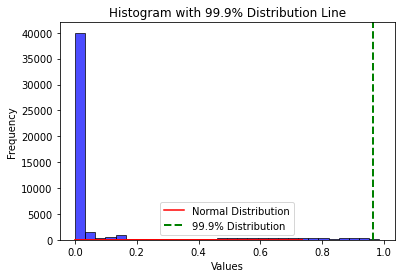

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generate sample data (replace this with your own list of values)
data = likelihoodlist

# Create histogram
plt.hist(data, bins=30,  alpha=0.7, color='blue', edgecolor='black')

# Calculate mean and standard deviation for the data
mean = np.mean(data)
std_dev = np.std(data)

# Create a range of values for x-axis based on the mean and standard deviation
x = np.linspace(0, mean + 3 * std_dev, 100)

# Plot the normal distribution curve (PDF) based on the mean and standard deviation
plt.plot(x, norm.pdf(x, mean, std_dev), 'r-', label='Normal Distribution')

# Calculate the values for the 95% distribution (replace 0.025 and 0.975 if you need a different confidence interval)

upper_bound = np.percentile(data, 99.9)

# Plot vertical lines for the 95% distribution
plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=2, label='99.9% Distribution')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram with 99.9% Distribution Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [19]:
compare

0.9845637738620864

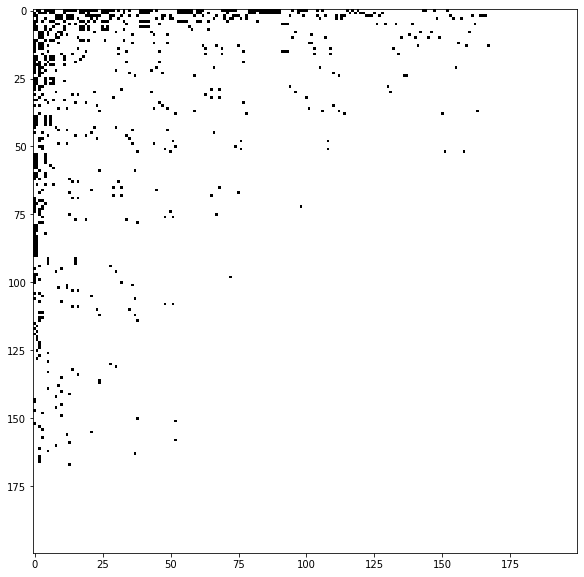

In [31]:
G=nx.from_numpy_array(np.array(simutable[8][46][10]))
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)

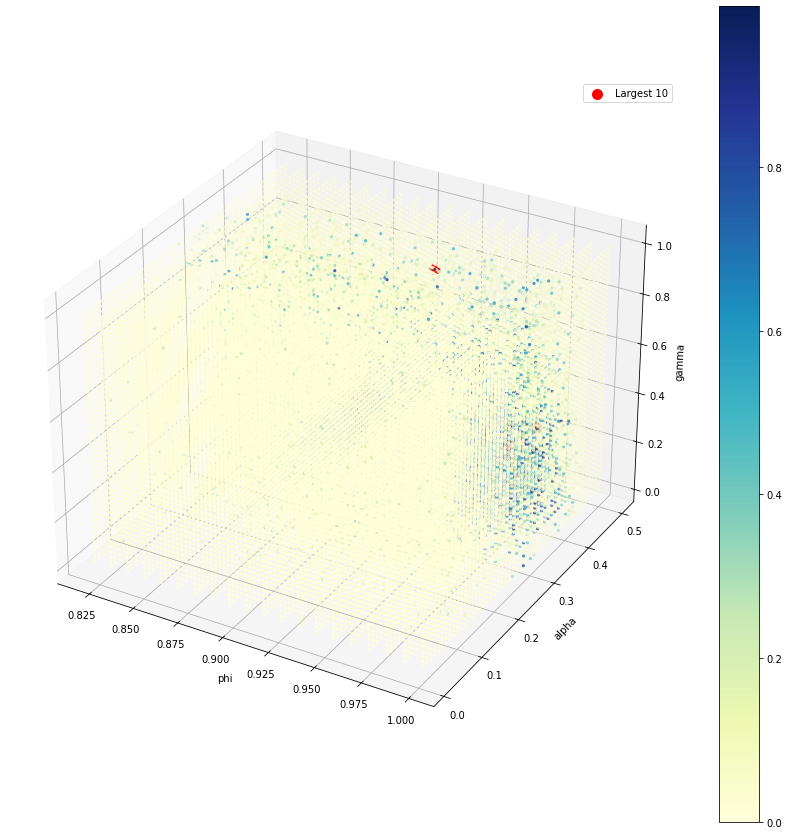

In [53]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data
x = np.linspace(0.82, 1, 20)
y = np.linspace(0.01, 0.5, 50)
z = np.linspace(0.02, 1, 50)

# Create a 3D grid of coordinates using np.meshgrid
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Create 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Flatten the coordinate arrays and likelihood list
x_flat, y_flat, z_flat = X.flatten(), Y.flatten(), Z.flatten()
likelihood_flat = np.array(likelihoodlist).flatten()

# Scatter plot with colors from likelihoodlist
p = ax.scatter(x_flat, y_flat, z_flat, c=likelihood_flat, cmap='YlGnBu', marker='.')

# Set labels for each axis
ax.set_xlabel('phi')
ax.set_ylabel('alpha')
ax.set_zlabel('gamma')

# Add colorbar
fig.colorbar(p, ax=ax, cmap='YlGnBu')

# Find indices of the largest 10 points
indices_largest = np.argpartition(likelihood_flat, -10)[-10:]

# Mark the largest points with red color
ax.scatter(x_flat[indices_largest], y_flat[indices_largest], z_flat[indices_largest],
           c='red', s=100, marker='o', label='Largest 10')

# Show the legend
ax.legend()

plt.show()

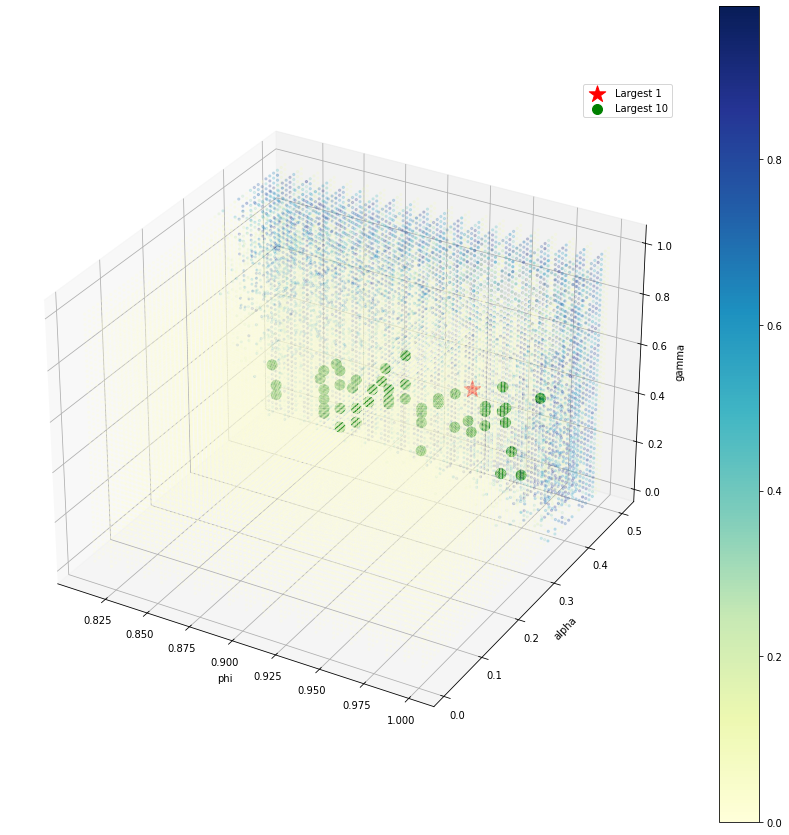

In [23]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data
x = np.linspace(0.81, 1, 20)
y = np.linspace(0.01, 0.5, 50)
z = np.linspace(0.02, 1, 50)

# Create a 3D grid of coordinates using np.meshgrid
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Replace this line with your actual likelihoodlist
likelihoodlist = np.array(likelihoodlist)

# Create 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Flatten the coordinate arrays and likelihood list
x_flat, y_flat, z_flat = X.flatten(), Y.flatten(), Z.flatten()
likelihood_flat = likelihoodlist.flatten()

# Calculate alpha (transparency) based on likelihood values
alpha_values = 0.2 + 0.1 * (likelihood_flat - np.min(likelihood_flat)) / (np.max(likelihood_flat) - np.min(likelihood_flat))

# Scatter plot with colors and transparency
p = ax.scatter(x_flat, y_flat, z_flat, c=likelihood_flat, cmap='YlGnBu', marker='.', alpha=alpha_values)

# Set labels for each axis
ax.set_xlabel('phi')
ax.set_ylabel('alpha')
ax.set_zlabel('gamma')

# Add colorbar
fig.colorbar(p, ax=ax, cmap='YlGnBu')

# Find indices of the largest 1 points
indices_largest_1 = np.argpartition(likelihood_flat, -1)[-1:]

# Mark the largest points with red color and higher opacity
ax.scatter(x_flat[indices_largest_1], y_flat[indices_largest_1], z_flat[indices_largest_1],
           c='red', s=300, marker='*', label='Largest 1', alpha=1.0)

# Find indices of the largest 10 points
indices_largest = np.argpartition(likelihood_flat, -50)[-50:]

indices_low= np.setdiff1d(np.argpartition(likelihood_flat, -50)[-50:],indices_largest_1)

# Mark the largest points with red color and higher opacity
ax.scatter(x_flat[indices_low], y_flat[indices_low], z_flat[indices_low],
           c='green', s=100, marker='o', label='Largest 10', alpha=1.0)


# Show the legend
ax.legend()

plt.show()

In [24]:
np.mean(x_flat[indices_largest])

0.8896

In [25]:
np.mean(y_flat[indices_largest])

0.4664

In [26]:
np.mean(z_flat[indices_largest])

0.20559999999999998

In [27]:
np.std(x_flat[indices_largest])

0.04395270185096699

In [28]:
np.std(y_flat[indices_largest])

0.0062481997407253295

In [29]:
np.std(z_flat[indices_largest])

0.09633607839226176

In [193]:
x_flat[indices_largest]

array([0.81, 0.81, 0.81, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.85, 0.85,
       0.85, 0.85, 0.85, 0.86, 0.86, 0.86, 0.86, 0.87, 0.87, 0.88, 0.88,
       0.88, 0.88, 0.88, 0.89, 0.89, 0.89, 0.9 , 0.9 , 0.9 , 0.9 , 0.91,
       0.91, 0.92, 0.92, 0.93, 0.93, 0.94, 0.94, 0.94, 0.95, 0.95, 0.95,
       0.95, 0.95, 0.96, 0.96, 0.97])

In [194]:
y_flat[indices_largest]

array([0.46, 0.47, 0.47, 0.46, 0.47, 0.47, 0.47, 0.47, 0.47, 0.46, 0.47,
       0.47, 0.47, 0.47, 0.46, 0.47, 0.47, 0.47, 0.46, 0.47, 0.45, 0.46,
       0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47,
       0.47, 0.47, 0.47, 0.46, 0.47, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46,
       0.47, 0.47, 0.44, 0.47, 0.47])

In [195]:
z_flat[indices_largest]

array([0.22, 0.08, 0.12, 0.22, 0.06, 0.08, 0.12, 0.16, 0.24, 0.3 , 0.02,
       0.1 , 0.2 , 0.26, 0.22, 0.06, 0.12, 0.24, 0.18, 0.22, 0.3 , 0.34,
       0.18, 0.2 , 0.24, 0.22, 0.28, 0.4 , 0.02, 0.14, 0.18, 0.2 , 0.24,
       0.26, 0.16, 0.3 , 0.22, 0.16, 0.22, 0.28, 0.3 , 0.04, 0.3 , 0.4 ,
       0.24, 0.3 , 0.18, 0.04, 0.38])

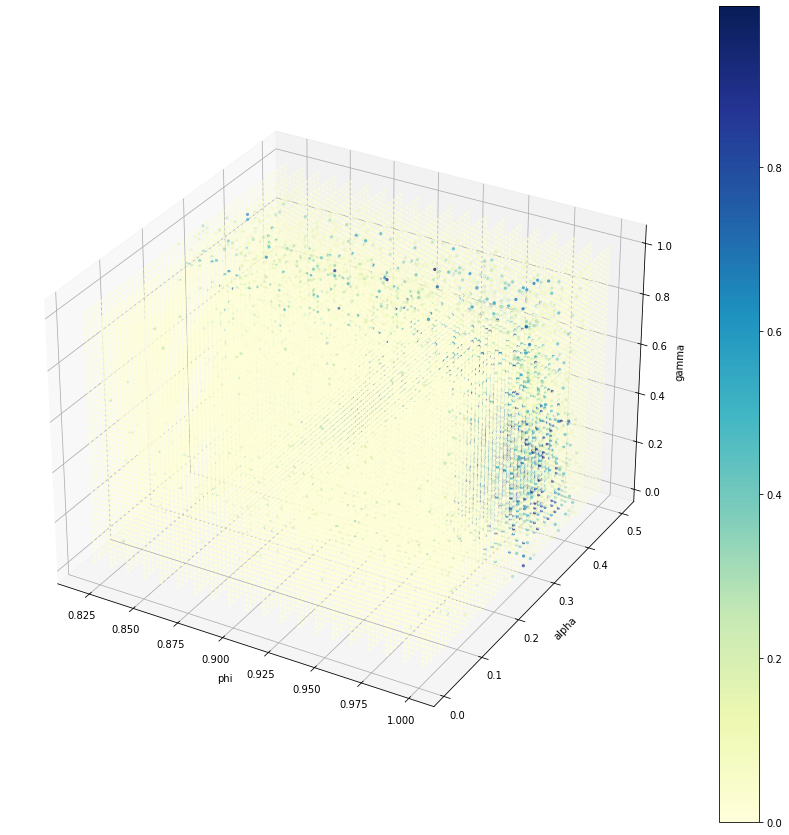

In [55]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data
x = np.linspace(0.82, 1, 20)
y = np.linspace(0.01, 0.5, 50)
z = np.linspace(0.02, 1, 50)

# Create a 3D grid of coordinates using np.meshgrid
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')


# Create 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Flatten the coordinate arrays and likelihood list
x_flat, y_flat, z_flat = X.flatten(), Y.flatten(), Z.flatten()
likelihood_flat = np.array(likelihoodlist).flatten()

# Scatter plot with colors from likelihoodlist
p = ax.scatter(x_flat, y_flat, z_flat, c=likelihood_flat,cmap='YlGnBu', marker='.')

# Set labels for each axis
ax.set_xlabel('phi')
ax.set_ylabel('alpha')
ax.set_zlabel('gamma')

# Add colorbar
fig.colorbar(p, ax=ax, cmap='YlGnBu')


In [ ]:
# statistical plotting

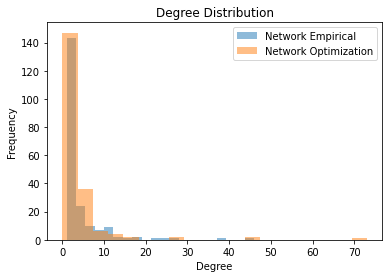

In [38]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate degree distributions
degree_dist_G1 = [degree for node, degree in G1.degree()]
degree_dist_G2 = [degree for node, degree in G2.degree()]

# Plot degree distributions
plt.hist(degree_dist_G1, bins=20, alpha=0.5, label='Network Empirical')
plt.hist(degree_dist_G2, bins=20, alpha=0.5, label='Network Optimization')

plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

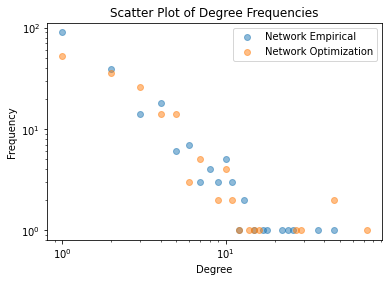

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 =  G_empirical  # Replace this with your actual data for the first network
G2 = G   # Replace this with your actual data for the second network

# Calculate degree distributions
degree_dist_G1 = dict(Counter(dict(G1.degree()).values()))
degree_dist_G2 = dict(Counter(dict(G2.degree()).values()))

# Create scatter plot
plt.scatter(degree_dist_G1.keys(), degree_dist_G1.values(), alpha=0.5, label='Network Empirical')
plt.scatter(degree_dist_G2.keys(), degree_dist_G2.values(), alpha=0.5, label='Network Optimization')


plt.xscale('log')
plt.yscale('log')

plt.title('Scatter Plot of Degree Frequencies')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

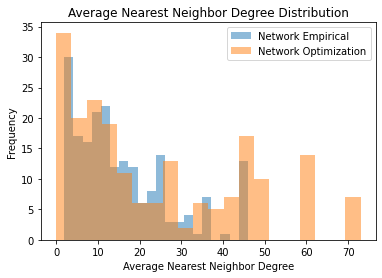

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate average nearest neighbor degrees
avg_nn_degree_G1 = list(nx.average_neighbor_degree(G1).values())
avg_nn_degree_G2 = list(nx.average_neighbor_degree(G2).values())

# Plot histograms
plt.hist(avg_nn_degree_G1, bins=20, alpha=0.5, label='Network Empirical')
plt.hist(avg_nn_degree_G2, bins=20, alpha=0.5, label='Network Optimization')

plt.title('Average Nearest Neighbor Degree Distribution')
plt.xlabel('Average Nearest Neighbor Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

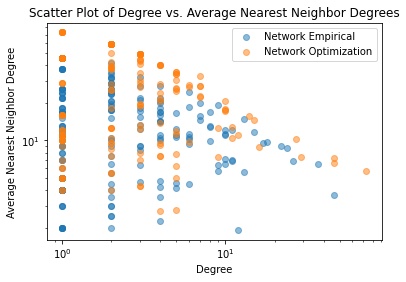

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G  # Replace this with your actual data for the second network

# Calculate degrees and average nearest neighbor degrees
degrees_G1 = dict(G1.degree())
avg_nn_degree_G1 = nx.average_neighbor_degree(G1)

degrees_G2 = dict(G2.degree())
avg_nn_degree_G2 = nx.average_neighbor_degree(G2)

# Extract values for scatter plot
x_values_G1 = list(degrees_G1.values())
y_values_G1 = list(avg_nn_degree_G1.values())

x_values_G2 = list(degrees_G2.values())
y_values_G2 = list(avg_nn_degree_G2.values())

# Create scatter plot
plt.scatter(x_values_G1, y_values_G1, alpha=0.5, label='Network Empirical')
plt.scatter(x_values_G2, y_values_G2, alpha=0.5, label='Network Optimization')

plt.xscale('log')
plt.yscale('log')

plt.title('Scatter Plot of Degree vs. Average Nearest Neighbor Degrees')
plt.xlabel('Degree')
plt.ylabel('Average Nearest Neighbor Degree')
plt.legend()
plt.show()



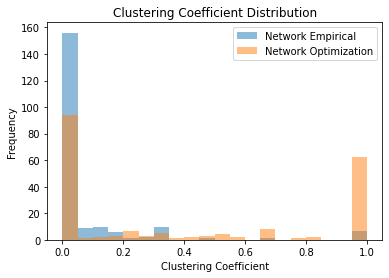

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate clustering coefficients
clustering_G1 = list(nx.clustering(G1).values())
clustering_G2 = list(nx.clustering(G2).values())

# Plot histograms
plt.hist(clustering_G1, bins=20, alpha=0.5, label='Network Empirical')
plt.hist(clustering_G2, bins=20, alpha=0.5, label='Network Optimization')

plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.legend()
plt.show()


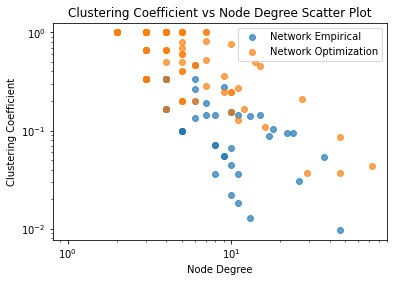

In [43]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical # Replace this with your actual data for the first network
G2 = G  # Replace this with your actual data for the second network

# Calculate clustering coefficients and node degrees
clustering_G1 = nx.clustering(G1)
clustering_G2 = nx.clustering(G2)

degrees_G1 = dict(G1.degree())
degrees_G2 = dict(G2.degree())

# Extract values for plotting
nodes_G1, coefficients_G1 = zip(*clustering_G1.items())
nodes_G2, coefficients_G2 = zip(*clustering_G2.items())

degrees_values_G1 = [degrees_G1[node] for node in nodes_G1]
degrees_values_G2 = [degrees_G2[node] for node in nodes_G2]

# Plot scatter plot with x-axis as node degree
plt.scatter(degrees_values_G1, coefficients_G1, label='Network Empirical', alpha=0.7)
plt.scatter(degrees_values_G2, coefficients_G2, label='Network Optimization', alpha=0.7)

plt.xscale('log')
plt.yscale('log')


plt.title('Clustering Coefficient vs Node Degree Scatter Plot')
plt.xlabel('Node Degree')
plt.ylabel('Clustering Coefficient')
plt.legend()
plt.show()

